In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import time
import random as rn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import matplotlib.patches as mpl_patches
from matplotlib import rcParams
from io import StringIO
import matplotlib.tri as mtri
colormap = cm.inferno
plt.rcParams.update({'font.size': 20})

In [16]:
order = np.loadtxt('SurfaceScaling_triangular_phi0.00_L50_2.txt')
print(order)
with open('SurfaceDist_triangular_phi0.00_L50_2.txt', 'r') as file:
    # Initialize container for the arrays
    arrays = []
    # Loop (iterate) over the lines of the file
    for line in file:
        # Remove whitespace at the ends (including \n = newline)
        line = line.strip()
        # Remove ';' from the end (at least in one line)
        line = line.rstrip(' ')
        # Split the line on the ';'s into a list of strings representing
        # the numbers
        numbers_str = line.split(' ')
        # Convert the list of string-numbers into a list (array) of integers
        array = [int(number_str) for number_str in numbers_str]
        # Append the newly created array to the array container
        arrays.append(array)


for i in range(len(arrays)):
    print(len(arrays[i]), np.where(np.array(arrays[i])[::2] != 0)[0])


[[1.00000e-03 0.00000e+00 2.05941e-01 2.02376e-01 2.02376e-01 5.00000e+00]
 [1.00000e-03 0.00000e+00 2.03960e-01 2.01584e-01 2.01584e-01 5.00000e+00]
 [1.00000e-03 0.00000e+00 2.13861e-01 2.05545e-01 2.05545e-01 5.00000e+00]
 [1.00000e-03 0.00000e+00 2.00000e-01 2.00000e-01 2.00000e-01 5.00000e+00]
 [1.50000e-03 0.00000e+00 1.55587e-01 1.46494e-01 1.46494e-01 7.00000e+00]
 [1.50000e-03 0.00000e+00 1.49929e-01 1.45282e-01 1.45282e-01 7.00000e+00]
 [1.50000e-03 0.00000e+00 1.49929e-01 1.44878e-01 1.44878e-01 7.00000e+00]
 [1.50000e-03 0.00000e+00 1.51344e-01 1.45686e-01 1.45686e-01 7.00000e+00]
 [2.25000e-03 0.00000e+00 1.00810e-01 9.27093e-02 9.27093e-02 1.10000e+01]
 [2.25000e-03 0.00000e+00 1.04410e-01 9.36912e-02 9.36912e-02 1.10000e+01]
 [2.25000e-03 0.00000e+00 1.00810e-01 9.27093e-02 9.27093e-02 1.10000e+01]
 [2.25000e-03 0.00000e+00 9.90099e-02 9.23820e-02 9.23820e-02 1.10000e+01]
 [3.37500e-03 0.00000e+00 7.73515e-02 6.45885e-02 6.45885e-02 1.60000e+01]
 [3.37500e-03 0.00000e+00

In [20]:
def statistics(data_set):
    """function to evaluate mean and variance (for errorbars) of order parameter

    Args:
        data_set (np.ndarray): data set
    """

    n_iterations = len(np.where(data_set[:] == data_set[0,0])[0]) # number of iterations per value of alpha

    len_alpha = len(data_set)//n_iterations

    alpha = np.zeros(len_alpha)
    mean_J = np.zeros(len_alpha)
    mean_c = np.zeros(len_alpha)
    mean_w = np.zeros(len_alpha)
    var_J = np.zeros(len_alpha)
    var_c = np.zeros(len_alpha)
    var_w = np.zeros(len_alpha)

    for n in range(len_alpha):
        alpha[n] = data_set[n * n_iterations, 0]
        J = data_set[n * n_iterations:(n+1) * n_iterations, 1]
        c = data_set[n * n_iterations:(n+1) * n_iterations, 3]
        w = data_set[n * n_iterations:(n+1) * n_iterations, 4]
        mean_J[n] = np.mean(J)
        mean_c[n] = np.mean(c)
        mean_w[n] = np.mean(w)

        var_J[n] = np.var(J)
        var_c[n] = np.var(c)
        var_w[n] = np.var(w)
    return alpha, mean_J, var_J, mean_c, var_c, mean_w, var_w

order_stat = statistics(order)

Text(0.5, 0, '$\\rho$')

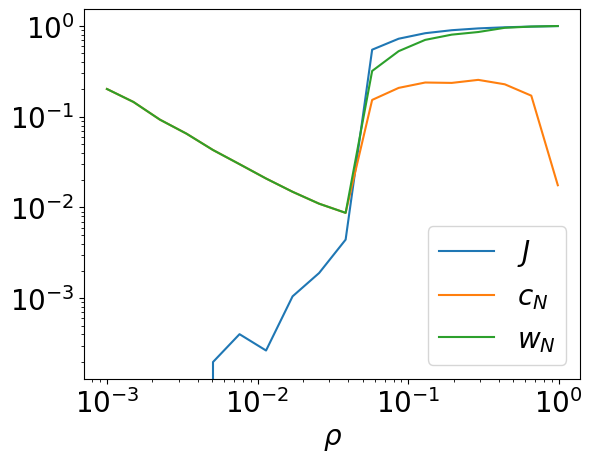

In [25]:
plt.plot(order_stat[0], order_stat[1], label=r"$J$")
plt.plot(order_stat[0], order_stat[3], label=r"$c_N$")
plt.plot(order_stat[0], order_stat[5], label=r"$w_N$")

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel(r'$\rho$')